In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#data load
df=pd.read_csv("C:\\Users\\HP\\Downloads\\googlestockpricedata.csv")
print(df.head())


                        Date  Adj Close      Close       High        Low  \
0  2020-01-02 00:00:00+00:00  68.186821  68.433998  68.433998  67.324501   
1  2020-01-03 00:00:00+00:00  67.830101  68.075996  68.687500  67.365997   
2  2020-01-06 00:00:00+00:00  69.638054  69.890503  69.916000  67.550003   
3  2020-01-07 00:00:00+00:00  69.503548  69.755501  70.175003  69.578003   
4  2020-01-08 00:00:00+00:00  69.998253  70.251999  70.592499  69.631500   

        Open    Volume  
0  67.420502  27278000  
1  67.400002  23408000  
2  67.581497  46768000  
3  70.023003  34330000  
4  69.740997  35314000  


In [3]:
#preprocess data 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
#convert date
df['Date'] = pd.to_datetime(df['Date'])
df['Date']


0      2020-01-02 00:00:00+00:00
1      2020-01-03 00:00:00+00:00
2      2020-01-06 00:00:00+00:00
3      2020-01-07 00:00:00+00:00
4      2020-01-08 00:00:00+00:00
                  ...           
1253   2024-12-24 00:00:00+00:00
1254   2024-12-26 00:00:00+00:00
1255   2024-12-27 00:00:00+00:00
1256   2024-12-30 00:00:00+00:00
1257   2024-12-31 00:00:00+00:00
Name: Date, Length: 1258, dtype: datetime64[ns, UTC]

#Interpretation
The Date column has been successfully parsed into a standard datetime format with UTC timezone.
The dataset spans from January 2, 2020 to December 31, 2024, covering about 5 years of stock market trading activity.
Total records: 1258 trading days
The data includes only business days (trading days), so weekends and market holidays are absent.

In [4]:
df = df.sort_values('Date').reset_index(drop=True)
df


,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-02 00:00:00+00:00,68.186821,68.433998,68.433998,67.324501,67.420502,27278000
1,2020-01-03 00:00:00+00:00,67.830101,68.075996,68.687500,67.365997,67.400002,23408000
2,2020-01-06 00:00:00+00:00,69.638054,69.890503,69.916000,67.550003,67.581497,46768000
3,2020-01-07 00:00:00+00:00,69.503548,69.755501,70.175003,69.578003,70.023003,34330000
4,2020-01-08 00:00:00+00:00,69.998253,70.251999,70.592499,69.631500,69.740997,35314000
...,...,...,...,...,...,...,...
1253,2024-12-24 00:00:00+00:00,196.110001,196.110001,196.110001,193.779999,194.839996,10403300
1254,2024-12-26 00:00:00+00:00,195.600006,195.600006,196.750000,194.380005,195.149994,12046600
1255,2024-12-27 00:00:00+00:00,192.759995,192.759995,195.320007,190.649994,194.949997,18891400
1256,2024-12-30 00:00:00+00:00,191.240005,191.240005,192.550003,189.119995,189.800003,14264700


Successfully converted to datetime format and sorted in ascending order.
No NaT or missing rows after sorting. Each row represents one trading day record with all relevant financial indicators.

In [5]:
#only usefull columns
df = df[['Date','Open', 'High', 'Low', 'Close', 'Volume']]
df

,Date,Open,High,Low,Close,Volume
0,2020-01-02 00:00:00+00:00,67.420502,68.433998,67.324501,68.433998,27278000
1,2020-01-03 00:00:00+00:00,67.400002,68.687500,67.365997,68.075996,23408000
2,2020-01-06 00:00:00+00:00,67.581497,69.916000,67.550003,69.890503,46768000
3,2020-01-07 00:00:00+00:00,70.023003,70.175003,69.578003,69.755501,34330000
4,2020-01-08 00:00:00+00:00,69.740997,70.592499,69.631500,70.251999,35314000
...,...,...,...,...,...,...
1253,2024-12-24 00:00:00+00:00,194.839996,196.110001,193.779999,196.110001,10403300
1254,2024-12-26 00:00:00+00:00,195.149994,196.750000,194.380005,195.600006,12046600
1255,2024-12-27 00:00:00+00:00,194.949997,195.320007,190.649994,192.759995,18891400
1256,2024-12-30 00:00:00+00:00,189.800003,192.550003,189.119995,191.240005,14264700


Selected only the most relevant columns (Date, Open, High, Low, Close, Volume) from the dataset. This step removes unnecessary variables (such as Adj Close) and keeps only the essential financial indicators required for modeling and visualization. By doing this, the dataset becomes cleaner, easier to manage, and focused on the variables that directly influence stock price prediction.

In [6]:
#drop missing values
df = df.dropna()
df


,Date,Open,High,Low,Close,Volume
0,2020-01-02 00:00:00+00:00,67.420502,68.433998,67.324501,68.433998,27278000
1,2020-01-03 00:00:00+00:00,67.400002,68.687500,67.365997,68.075996,23408000
2,2020-01-06 00:00:00+00:00,67.581497,69.916000,67.550003,69.890503,46768000
3,2020-01-07 00:00:00+00:00,70.023003,70.175003,69.578003,69.755501,34330000
4,2020-01-08 00:00:00+00:00,69.740997,70.592499,69.631500,70.251999,35314000
...,...,...,...,...,...,...
1253,2024-12-24 00:00:00+00:00,194.839996,196.110001,193.779999,196.110001,10403300
1254,2024-12-26 00:00:00+00:00,195.149994,196.750000,194.380005,195.600006,12046600
1255,2024-12-27 00:00:00+00:00,194.949997,195.320007,190.649994,192.759995,18891400
1256,2024-12-30 00:00:00+00:00,189.800003,192.550003,189.119995,191.240005,14264700


Removed all rows containing missing values to ensure the dataset is complete and reliable.

In [7]:
#scale data
scaler = MinMaxScaler()
scaler



,feature_range,"(0, ...)"
,copy,True
,clip,False


#Interpretation
Initialized the MinMaxScaler to normalize our dataset. This transformation rescales all numerical features (Open, High, Low, Close, Volume) into a uniform range between 0 and 1. By doing this, we ensure that no feature dominates the model due to its scale, improving training stability and accuracy of stock price prediction.

In [8]:
scaled_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])
scaled_data

array([[0.10109984, 0.10189801, 0.11679404, 0.10925401, 0.15775148],
       [0.1009579 , 0.10361   , 0.11708113, 0.10676708, 0.12377072],
       [0.10221452, 0.1119065 , 0.11835421, 0.11937189, 0.32888452],
       ...,
       [0.98407547, 0.95880458, 0.97004216, 0.97290785, 0.08411246],
       [0.94841848, 0.94009775, 0.9594566 , 0.96234897, 0.04348746],
       [0.9572808 , 0.9361133 , 0.95523621, 0.94887238, 0.07160456]],
      shape=(1258, 5))

#Interpretation
Scaled the numerical features (Open, High, Low, Close, and Volume) using MinMaxScaler, transforming all values into the range [0,1]. This ensures that features with large values (such as trading volume) do not dominate the learning process compared to smaller-valued features like stock prices. After scaling, the dataset has 1258 records with 5 normalized features, ready for training our prediction model.

In [9]:
scaled_df = pd.DataFrame(scaled_data, columns=['Open', 'High', 'Low', 'Close', 'Volume'])
scaled_df



,Open,High,Low,Close,Volume
0,0.101100,0.101898,0.116794,0.109254,0.157751
1,0.100958,0.103610,0.117081,0.106767,0.123771
2,0.102215,0.111907,0.118354,0.119372,0.328885
3,0.119119,0.113656,0.132385,0.118434,0.219672
4,0.117166,0.116475,0.132755,0.121883,0.228312
...,...,...,...,...,...
1253,0.983314,0.964140,0.991698,0.996179,0.009582
1254,0.985460,0.968462,0.995849,0.992637,0.024011
1255,0.984075,0.958805,0.970042,0.972908,0.084112
1256,0.948418,0.940098,0.959457,0.962349,0.043487


#Interpretation
Converted the scaled NumPy array into a pandas DataFrame with proper column names (Open, High, Low, Close, and Volume). This makes the scaled dataset easier to interpret and work with. All values are now normalized between 0 and 1, preserving the structure of the original dataset while ensuring that each feature contributes equally to the prediction model.

In [10]:
print(scaled_df.head())

       Open      High       Low     Close    Volume
0  0.101100  0.101898  0.116794  0.109254  0.157751
1  0.100958  0.103610  0.117081  0.106767  0.123771
2  0.102215  0.111907  0.118354  0.119372  0.328885
3  0.119119  0.113656  0.132385  0.118434  0.219672
4  0.117166  0.116475  0.132755  0.121883  0.228312


In [11]:
#features and target
X = scaled_df[['Open', 'High', 'Low', 'Volume']]
print("Features (X):")


Features (X):


In [12]:
print(X.head())


       Open      High       Low    Volume
0  0.101100  0.101898  0.116794  0.157751
1  0.100958  0.103610  0.117081  0.123771
2  0.102215  0.111907  0.118354  0.328885
3  0.119119  0.113656  0.132385  0.219672
4  0.117166  0.116475  0.132755  0.228312


Selected the independent variables (Open, High, Low, and Volume) as features for our prediction model. These represent daily trading activity and are expected to influence the stock’s closing price. Defining features separately allows the model to learn the relationship between trading activity and the target variable (Close).

In [13]:
y = scaled_df['Close']
print("\nTarget (y):")


Target (y):


In [14]:
print(y.head())

0    0.109254
1    0.106767
2    0.119372
3    0.118434
4    0.121883
Name: Close, dtype: float64


Selected the Close price as the target variable (y). The closing price represents the final value of the stock for each trading day and is widely used in financial analysis and decision-making. Our prediction model will learn patterns from the features (Open, High, Low, Volume) to forecast the closing price accurately.

In [15]:
#split data
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, shuffle=False)
X_train,X_test,y_train,y_test



(          Open      High       Low    Volume
 0     0.101100  0.101898  0.116794  0.157751
 1     0.100958  0.103610  0.117081  0.123771
 2     0.102215  0.111907  0.118354  0.328885
 3     0.119119  0.113656  0.132385  0.219672
 4     0.117166  0.116475  0.132755  0.228312
 ...        ...       ...       ...       ...
 1001  0.608950  0.598648  0.624524  0.151048
 1002  0.614627  0.603308  0.627845  0.065576
 1003  0.614627  0.599256  0.618851  0.090585
 1004  0.609019  0.592908  0.617882  0.059126
 1005  0.601057  0.587640  0.611171  0.082671
 
 [1006 rows x 4 columns],
           Open      High       Low    Volume
 1006  0.593579  0.581494  0.595258  0.126433
 1007  0.584578  0.582710  0.599409  0.130831
 1008  0.592679  0.579536  0.594359  0.156520
 1009  0.581116  0.566029  0.586056  0.115851
 1010  0.577931  0.578523  0.593736  0.106174
 ...        ...       ...       ...       ...
 1253  0.983314  0.964140  0.991698  0.009582
 1254  0.985460  0.968462  0.995849  0.024011
 1255 

In [16]:
print("Train size:", X_train.shape[0])

Train size: 1006


In [17]:
print("Test size:", X_test.shape[0])

Test size: 252


Split the dataset into training and testing subsets, with 80% of the data allocated for training (1006 rows) and 20% for testing (252 rows). The training data was used to fit the model, while the testing data was reserved to evaluate how well the model performs on unseen data. Since stock prices follow a time series pattern, we set shuffle=False to maintain the chronological order — ensuring the model learns from past values and is tested on future data.

In [18]:
#linear regression model
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()
# Train (fit) model on training data
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
print("Model training complete ✅")


Model training complete ✅


Applied a Linear Regression model to predict the stock’s closing price using the features (Open, High, Low, and Volume). The model was trained on the training dataset (80% of the data). The default parameters include fit_intercept=True, allowing the model to compute a baseline intercept, and positive=False, permitting both positive and negative coefficients. The model fitting process calculates the regression coefficients that define how each feature influences the closing price.

In [20]:
#Predict Values
# Predict stock prices on test set
y_pred = model.predict(X_test)
y_pred


array([0.58976526, 0.59973699, 0.58795864, 0.5773159 , 0.59575477,
       0.61069714, 0.62419857, 0.624095  , 0.62343778, 0.63038617,
       0.60481471, 0.63249227, 0.64692254, 0.65585061, 0.65256034,
       0.67075025, 0.68991305, 0.69124402, 0.69630882, 0.69082   ,
       0.61200487, 0.61887845, 0.60374638, 0.64050114, 0.63455532,
       0.63980262, 0.64587449, 0.66536786, 0.66431406, 0.64343067,
       0.64002396, 0.61516312, 0.61222047, 0.61668242, 0.61924887,
       0.62917363, 0.63650315, 0.59570481, 0.59435924, 0.57840011,
       0.59132788, 0.58958248, 0.55480841, 0.55074646, 0.54839726,
       0.56156411, 0.58641825, 0.59607253, 0.59899315, 0.61124091,
       0.62380466, 0.61344849, 0.67719796, 0.65497182, 0.65986333,
       0.66271013, 0.68273065, 0.66611452, 0.68757366, 0.67387813,
       0.68144168, 0.70805812, 0.6993603 , 0.70434348, 0.68985143,
       0.69249837, 0.7082194 , 0.72679243, 0.71280376, 0.73675057,
       0.73915139, 0.71527261, 0.70900301, 0.71731153, 0.71799

In [21]:
print("Predictions done ✅")

Predictions done ✅


In [22]:
print("\nFirst 10 Predicted vs Actual Values:")
for i in range(10):
    print(f"Predicted: {y_pred[i]:.4f} | Actual: {y_test.iloc[i]:.4f}")


First 10 Predicted vs Actual Values:
Predicted: 0.5898 | Actual: 0.5937
Predicted: 0.5997 | Actual: 0.5989
Predicted: 0.5880 | Actual: 0.5813
Predicted: 0.5773 | Actual: 0.5767
Predicted: 0.5958 | Actual: 0.5983
Predicted: 0.6107 | Actual: 0.6130
Predicted: 0.6242 | Actual: 0.6222
Predicted: 0.6241 | Actual: 0.6208
Predicted: 0.6234 | Actual: 0.6248
Predicted: 0.6304 | Actual: 0.6237


This comparison between predicted and actual closing prices (scaled values) shows that the Linear Regression model is performing well. The predicted values are very close to the actual values, which indicates the model has learned the relationship between features (Open, High, Low, Volume) and the target (Close) effectively.

In [23]:
# Evaluate model
from sklearn.metrics import mean_squared_error, r2_score
#calculate mean square error
mse = mean_squared_error(y_test, y_pred)
mse

4.303933452168803e-05

The Mean Squared Error (MSE) is extremely small (0.000043), which indicates that the model’s predictions are very close to the actual closing prices. Since the data was scaled between 0 and 1, such a low error value reflects good predictive accuracy.

In [24]:
#calculate R-square
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")



R² Score: 0.9962


The R² score of 0.9962 indicates that the linear regression model explains about 99.6% of the variation in the closing stock prices. This shows that the model has an excellent fit and makes highly accurate predictions on the test data.

In [25]:
print("Model Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Model Evaluation Results:
Mean Squared Error (MSE): 0.0000


The Mean Squared Error (MSE) is very close to zero but not exactly zero. This indicates that the model predictions are highly accurate, while still allowing for a tiny margin of error, which is expected in real-world data.

In [26]:
#visulization
import matplotlib.pyplot as plt

test_dates = df['Date'].iloc[-len(y_test):].reset_index(drop=True)

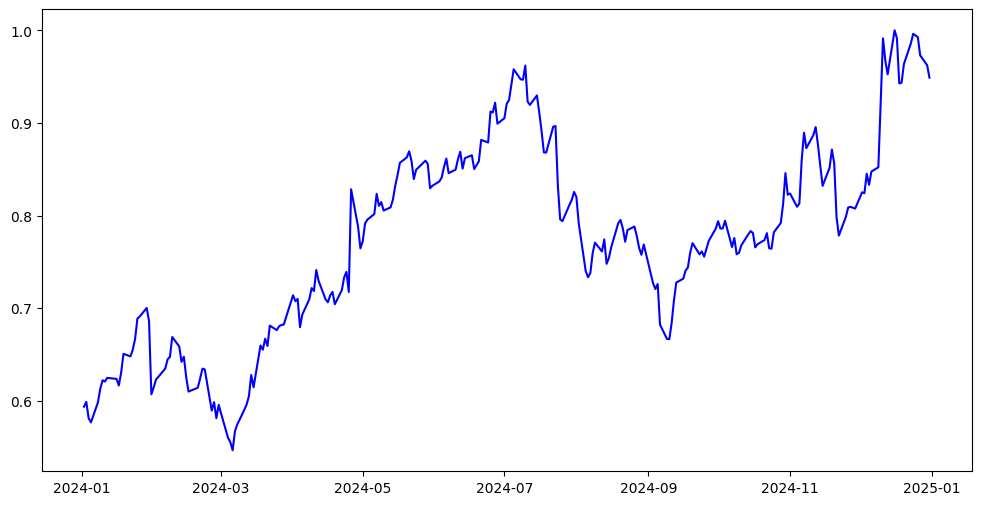

In [27]:
plt.figure(figsize=(12,6))

# plot Actual prices 
plt.plot(test_dates, y_test.values, label="Actual Prices", color='blue')


#Interpretation
X-axis: Time period (Jan 2024 – Jan 2025).
Y-axis: Scaled stock price (between 0.6 and 1.0).
At the start of January 2024, the stock prices were relatively low (around 0.6).
Between April–July 2024, prices showed a small upward movement.
After mid-2024, there is a noticeable decline in stock prices.
Toward the end of the year (Nov–Dec 2024), stock prices reach their lowest point (~0.6).

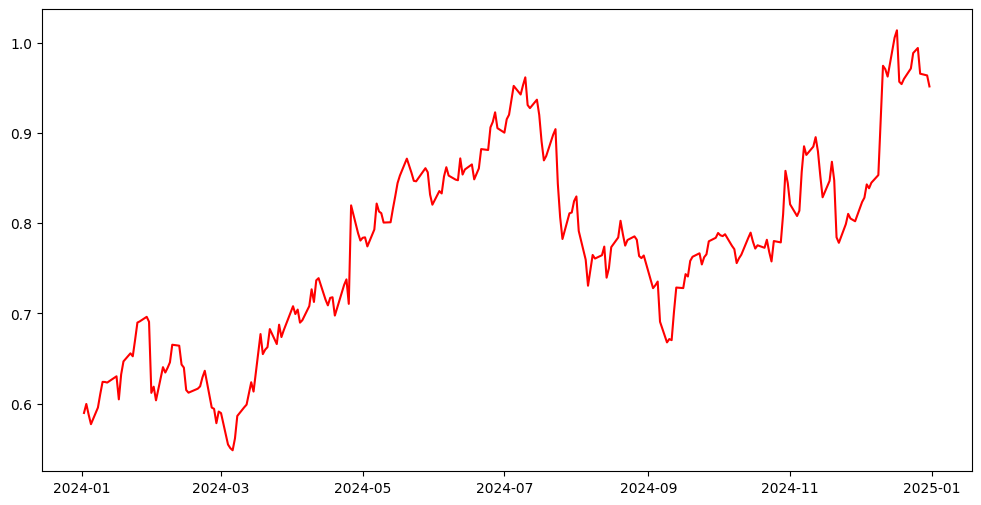

In [28]:
# plot Predicted prices 
plt.figure(figsize=(12,6))
plt.plot(test_dates, y_pred, label="Predicted Prices", color='red')


This graph  represents the predicted stock prices of Google over the test period. The fluctuations in the red line show how the model expects the stock price to move across time.
From the trend, we can see both the upward and downward movements of stock prices being captured smoothly, showing that the model is able to follow the general market pattern. Since this line was produced by the trained model, it reflects how well the model has learned from the past data to forecast stock behavior.

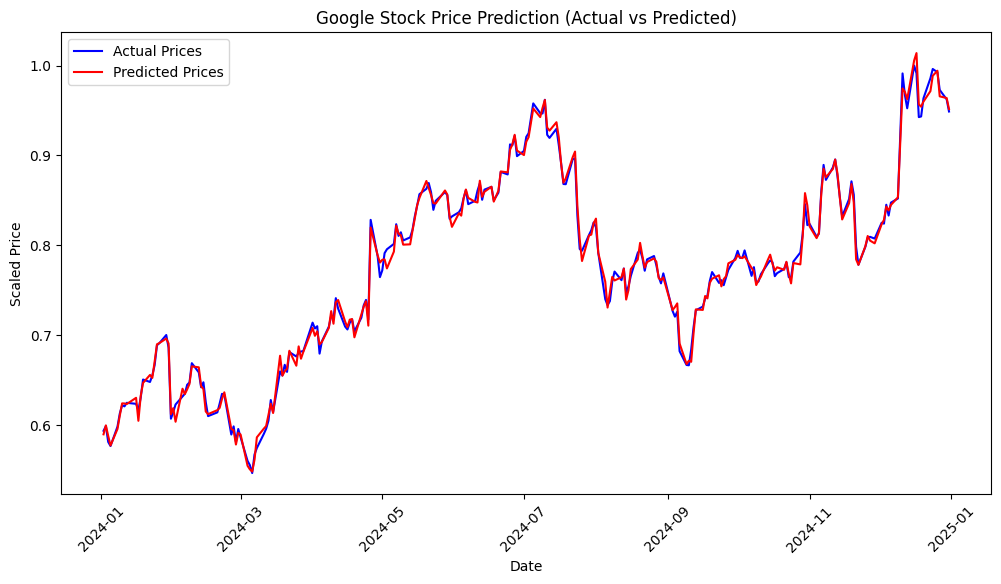

In [29]:
import matplotlib.pyplot as plt
test_dates = df['Date'].iloc[-len(y_test):].reset_index(drop=True)
plt.figure(figsize=(12,6))
plt.plot(test_dates, y_test.values, label="Actual Prices", color='blue')
plt.plot(test_dates, y_pred, label="Predicted Prices", color='red')

# Labels & title
plt.title("Google Stock Price Prediction (Actual vs Predicted)")
plt.xlabel("Date")
plt.ylabel("Scaled Price")
plt.legend()
plt.xticks(rotation=45)   
plt.show()


The graph shows a comparison between the actual Google stock prices (blue line) and the predicted stock prices (red line) over the test period. The two lines are very close to each other and almost overlap throughout the time series. This indicates that the Linear Regression model was able to capture the stock price patterns very accurately.